In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(tf.__version__)
%matplotlib inline

1.14.0


## Utils funcs

In [2]:
def generate_data(x1_root_pos, x2_root_pos, x1_root_neg, x2_root_neg, n_sample, test_raito=0.3):
    # Generate two sets of data point and label
    x1_pos = np.random.rand(n_sample) + x1_root_pos
    x2_pos = np.random.rand(n_sample) + x2_root_pos
    x1_neg = np.random.rand(n_sample) + x1_root_neg
    x2_neg = np.random.rand(n_sample) + x2_root_neg
    label = np.concatenate([np.ones(n_sample, dtype=float), np.zeros(n_sample, dtype=float)])
    
    # Combine features and shuffle
    x1_data = np.expand_dims(np.concatenate([x1_pos, x1_neg]), axis=1)
    x2_data = np.expand_dims(np.concatenate([x2_pos, x2_neg]), axis=1)
    x_data = np.concatenate([x1_data, x2_data], axis=1)
    
    # Split train test set
    #train_test_split: random chia tap du lieu thanh tap train va tap test lay tu x_data, y_label voi ty le
    # test_raito % la test
    x_train, x_test, label_train, label_test = train_test_split(x_data, label, test_size=test_raito, random_state=42)
    return x_train, x_test, label_train, label_test


def visualize_data(x, label, title=''):
    # Plot data using matplot lib
    for i in range(len(label)):
        if label[i] == 0:
            plt.plot(x[i][0], x[i][1], 'b+')
        elif label[i] == 1:
            plt.plot(x[i][0], x[i][1], 'ro')
    
    plt.ylabel('X1 Feature')
    plt.xlabel('X2 Feature')
    plt.title(title)
    plt.show()

def draw_model(w1, w2, b):
    # Draw line w1x + w2y + b = 0
    x = np.arange(-2, 2, 0.2)
    y = (-w1 * x - b) / w2
    plt.plot(x, y)

## Init model

In [3]:
def define_parameters():
    # TODO 1: Initialize parameters w1, w2, b of logistic model 
    w1 = tf.Variable(tf.random_normal(shape=()), dtype=tf.float32, name='w1')
    w2 = tf.Variable(tf.random_normal(shape=()), dtype=tf.float32, name='w2')
    b = tf.Variable(tf.random_normal(shape=()), dtype=tf.float32, name='wb')
    
    return w1, w2, b
  
def Sigmoid(z):
    return 1. /(1. + tf.exp(-z))
    
def define_cost_func(X1, X2, L, w1, w2, b, n_sample):
    # TODO 2: define hypothesis 'h' and cost function cost 'cost'
    z = w1*X1 + w2*X2 + b
    h = Sigmoid(z)
    
    cost = tf.add(tf.multiply(L, tf.log(h)), tf.multiply((1-L),tf.log(1-h)))
    
    return -tf.reduce_sum(cost)/n_sample

def define_optimizer(l_rate, cost_func):
    # Define optimizer and initializer
    optimizer = tf.train.GradientDescentOptimizer(l_rate).minimize(cost_func)
    initializer = tf.global_variables_initializer()
    return optimizer, initializer

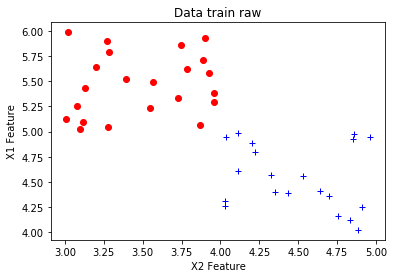

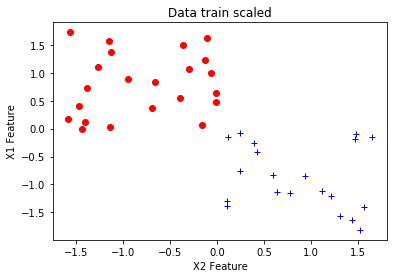

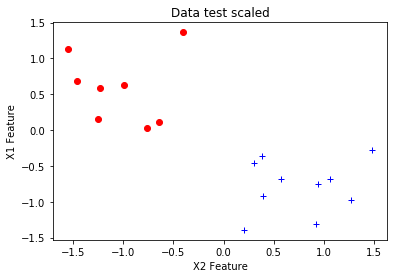

In [4]:
# Step 1: Generate and visualize training data
n_sample = 30
x_train, x_test, label_train, label_test = generate_data(3, 5, 4, 4, n_sample)
visualize_data(x_train, label_train, "Data train raw")

# Step 1b: Normalize Xs and re-visualize training data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)#tim tham so, tranform: su dung tren train data
x_test = scaler.transform(x_test)

visualize_data(x_train, label_train, "Data train scaled")
visualize_data(x_test, label_test, "Data test scaled")

# Step 2: Initialize Placeholders for input data
X1 = tf.placeholder(np.float32)
X2 = tf.placeholder(np.float32)
L = tf.placeholder(np.float32)#label
batch_size = tf.placeholder(np.float32)

### Step 3: Build up your first model: LOGISTIC REGRESSOR
w1, w2, b = define_parameters()
cost = define_cost_func(X1, X2, L, w1, w2, b, batch_size)

# Step 4: Create optimizer
l_rate = 0.1
optimizer, initializer = define_optimizer(l_rate, cost)

## Train model

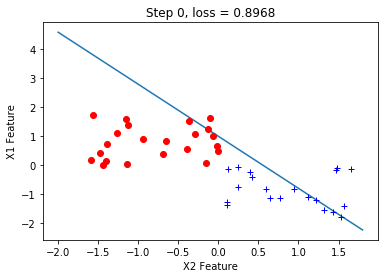

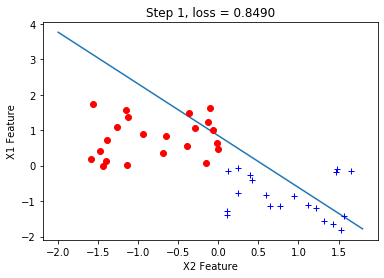

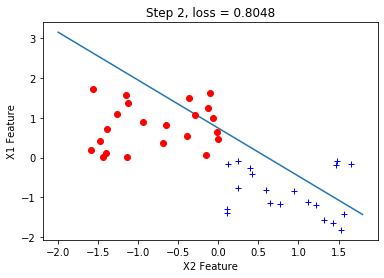

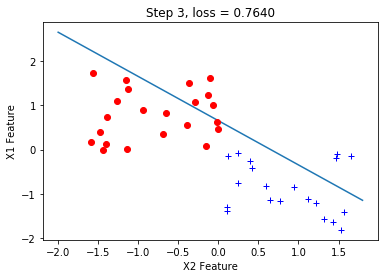

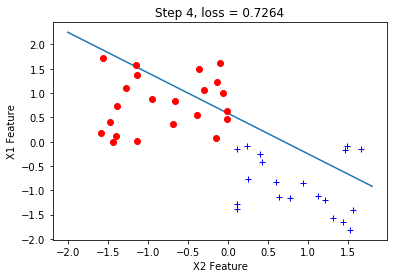

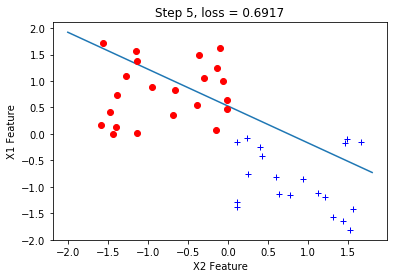

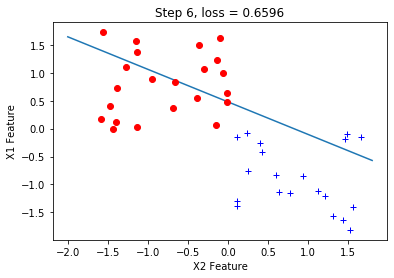

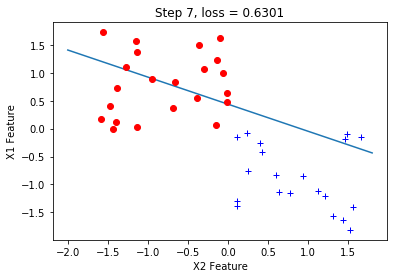

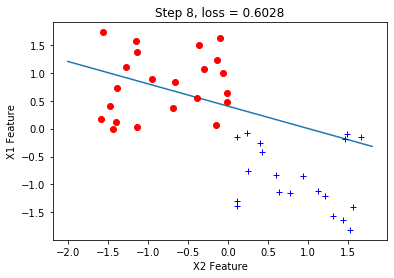

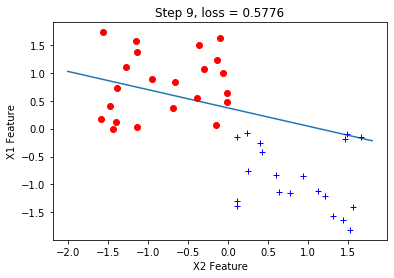

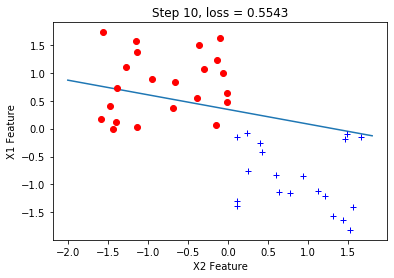

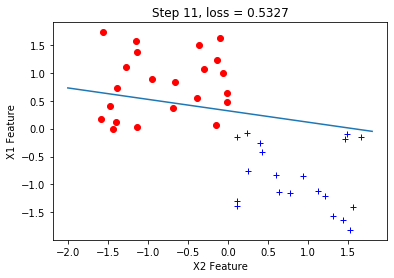

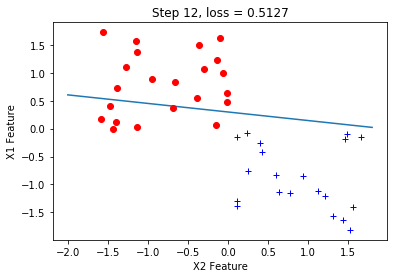

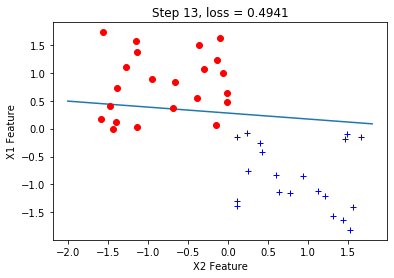

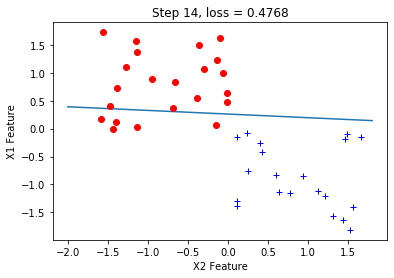

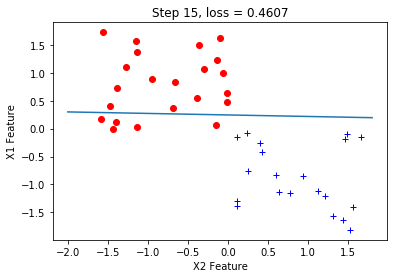

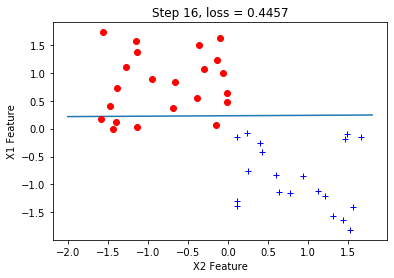

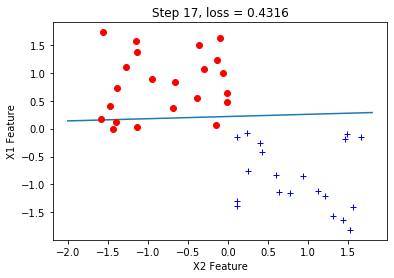

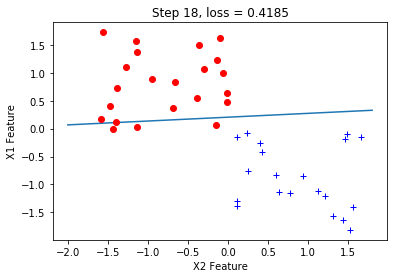

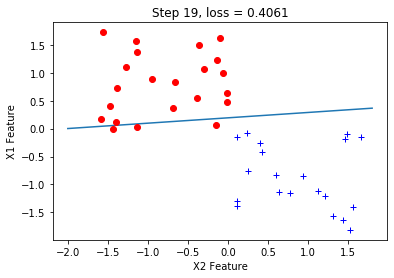

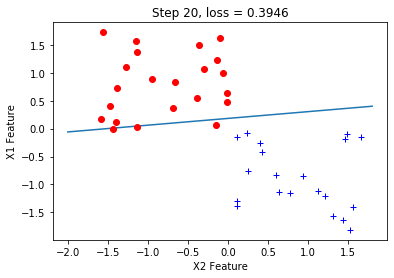

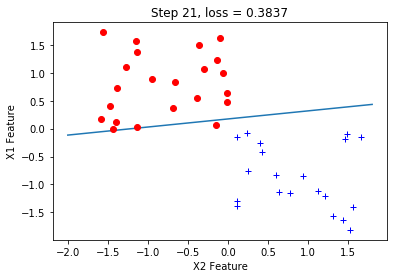

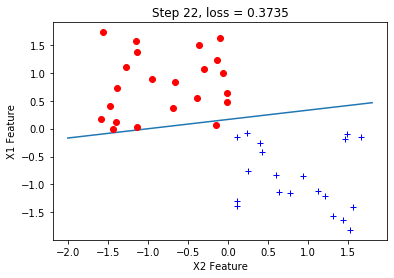

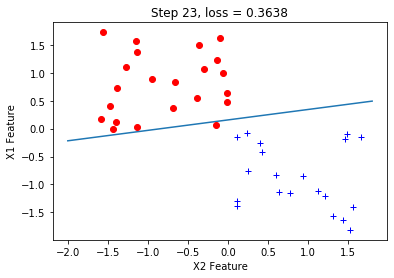

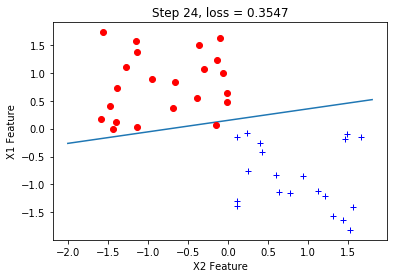

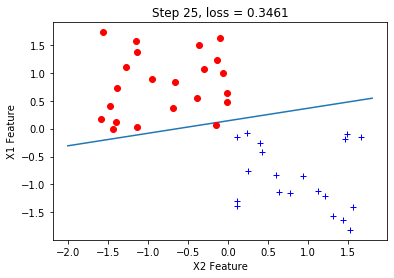

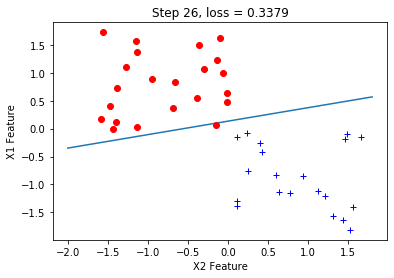

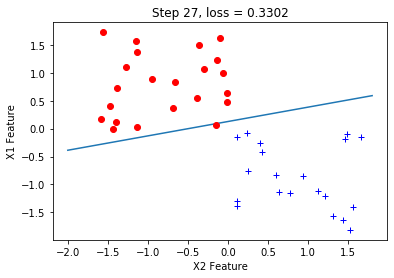

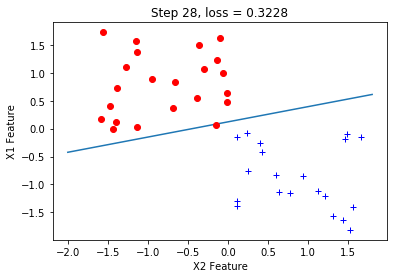

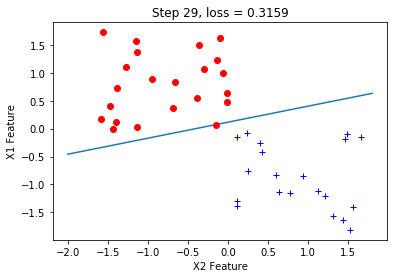

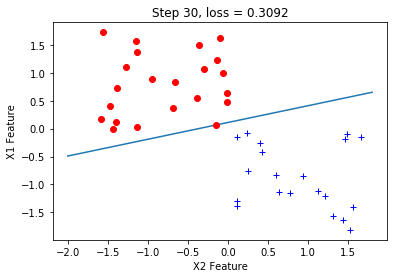

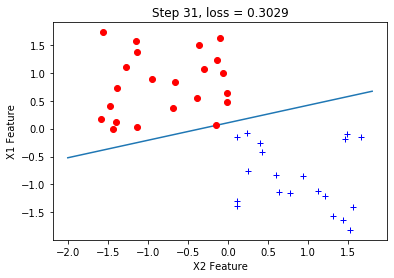

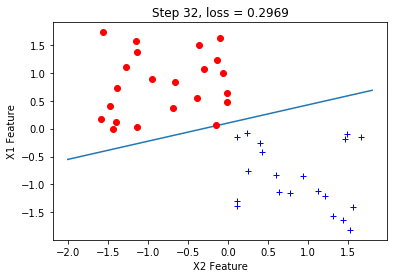

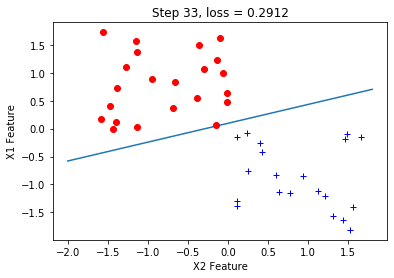

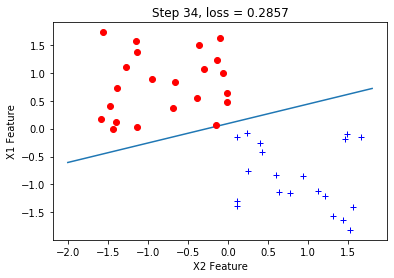

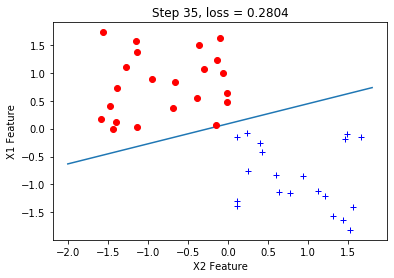

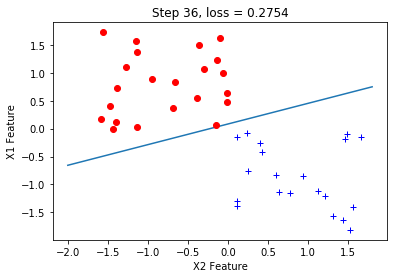

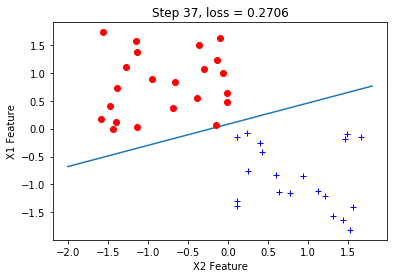

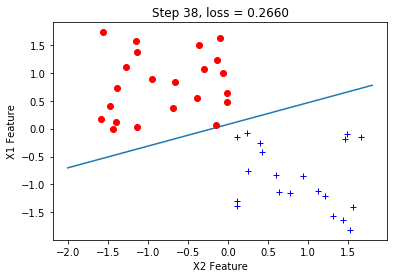

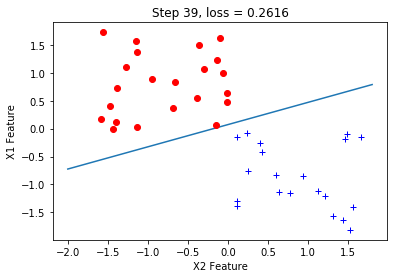

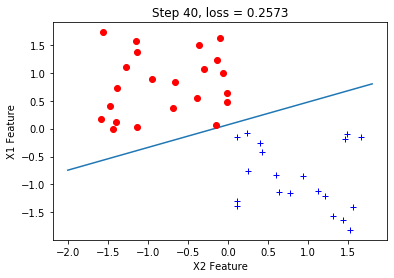

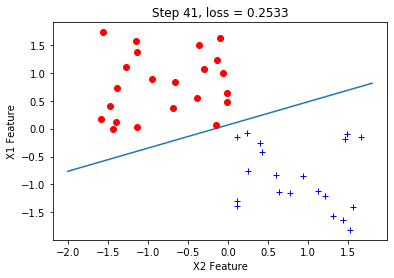

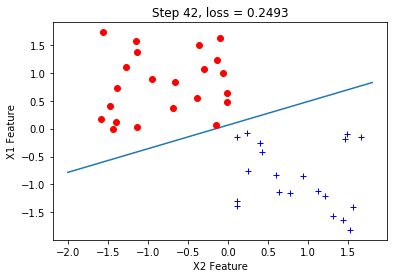

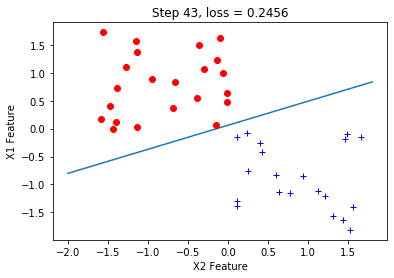

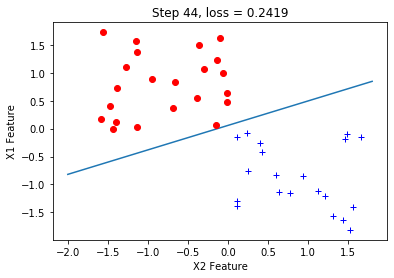

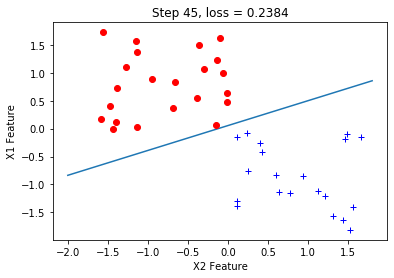

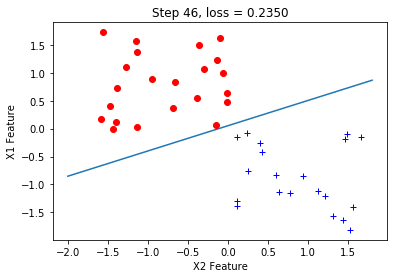

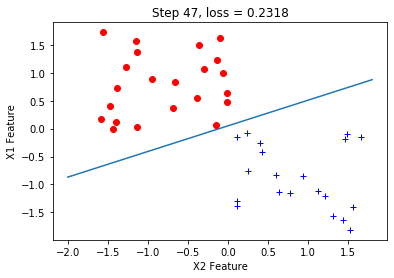

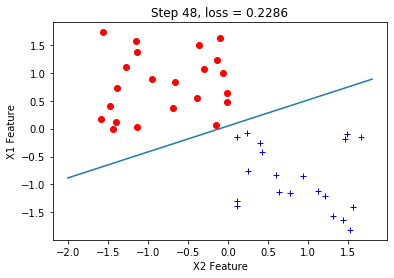

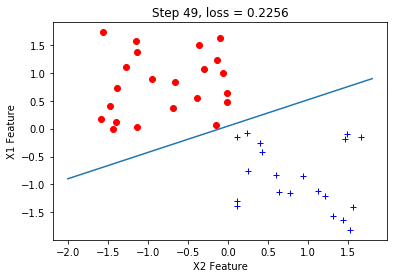

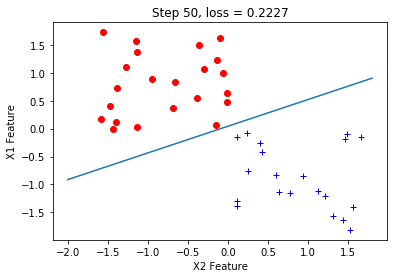

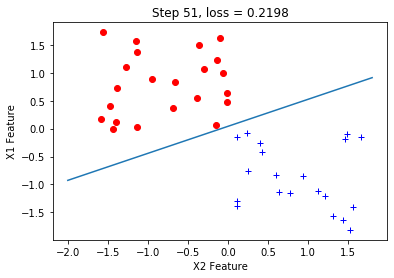

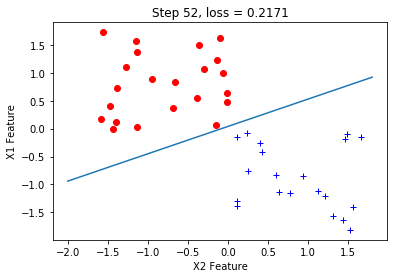

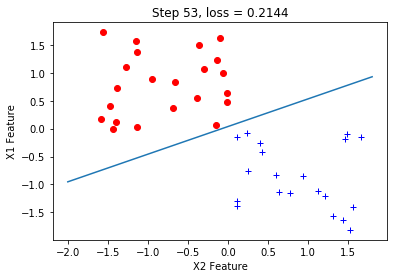

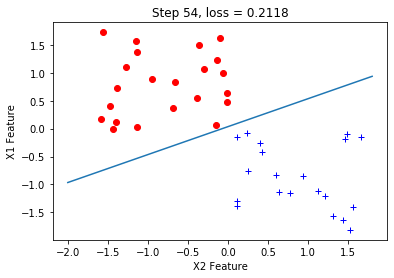

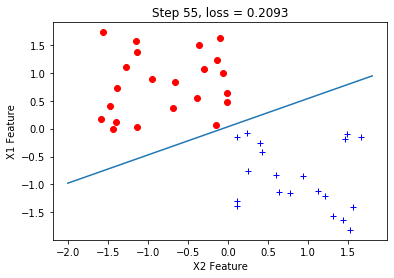

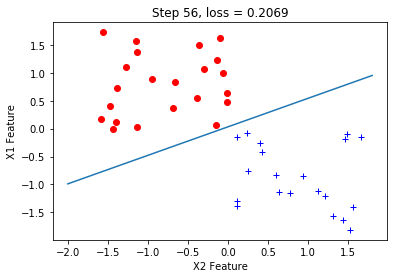

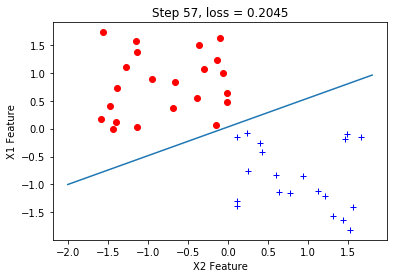

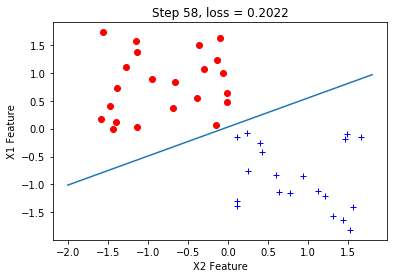

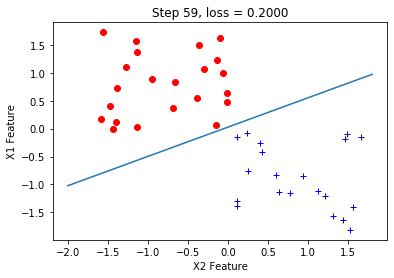

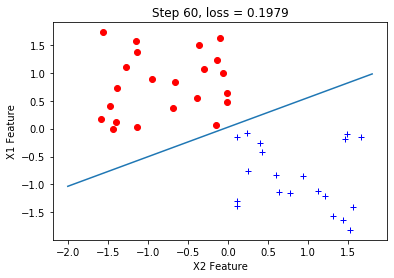

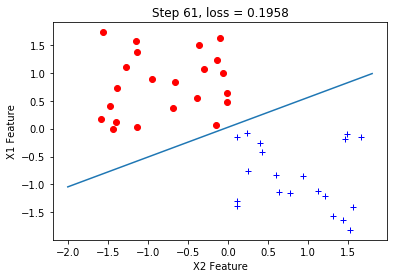

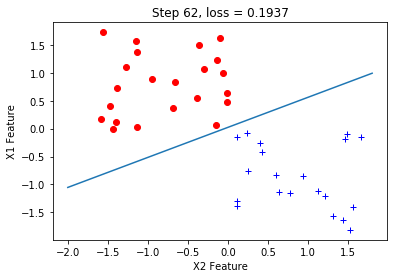

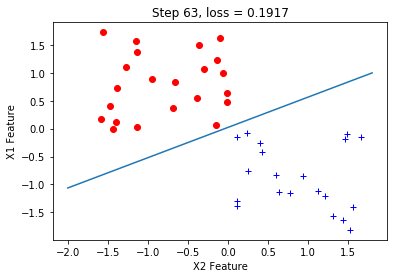

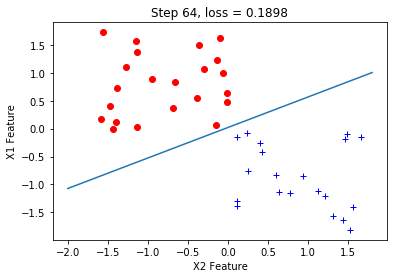

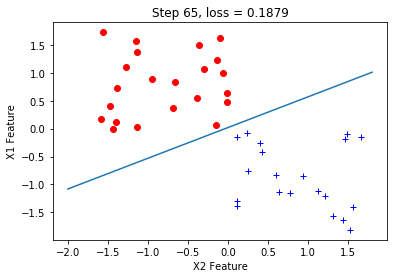

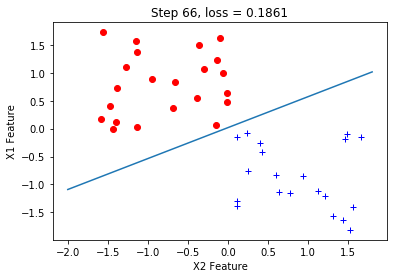

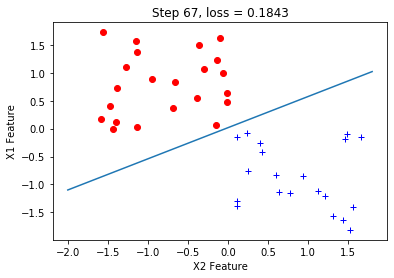

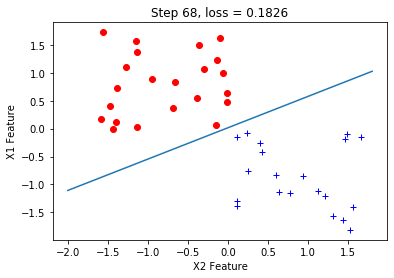

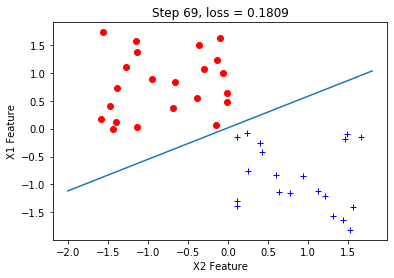

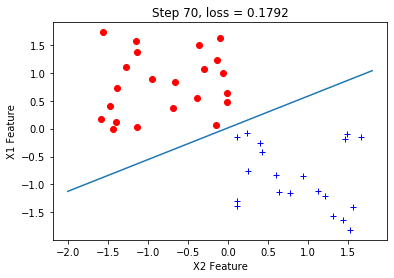

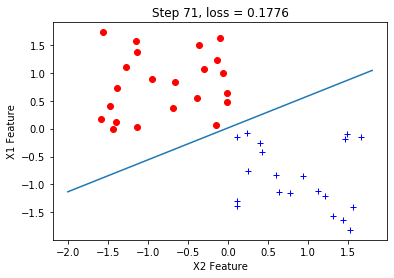

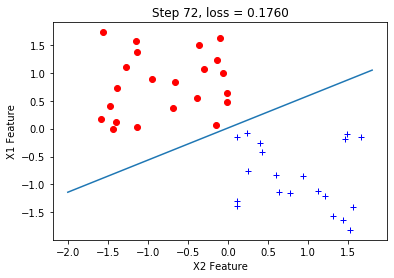

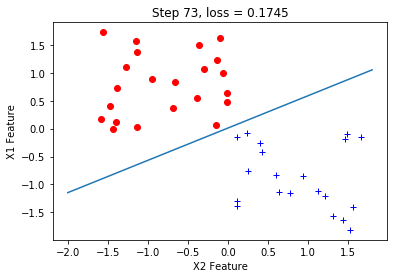

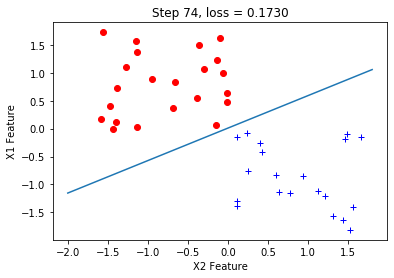

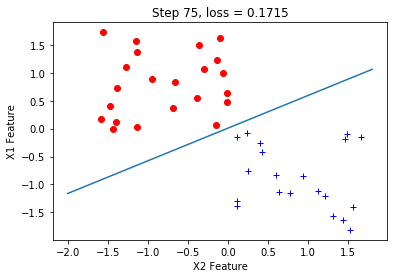

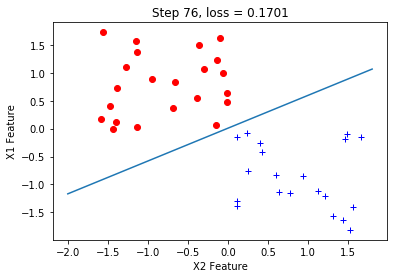

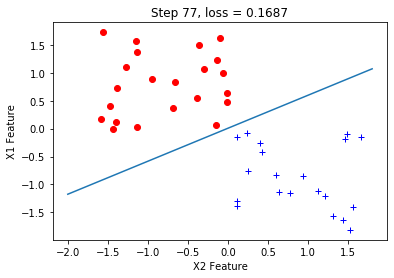

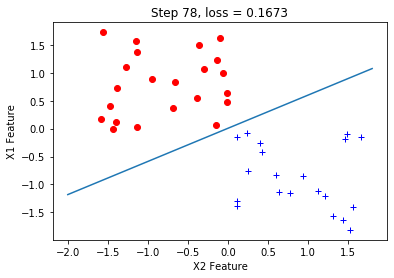

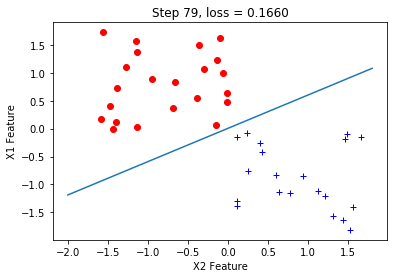

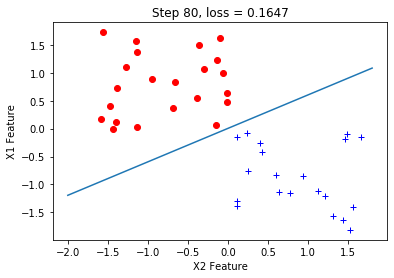

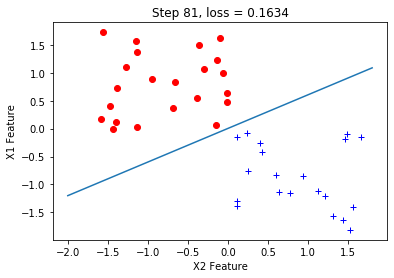

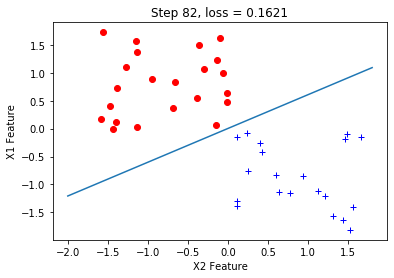

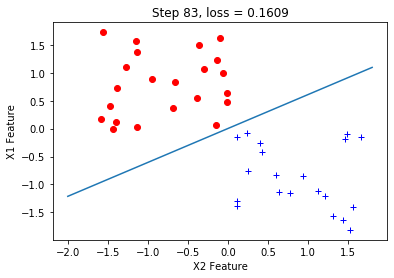

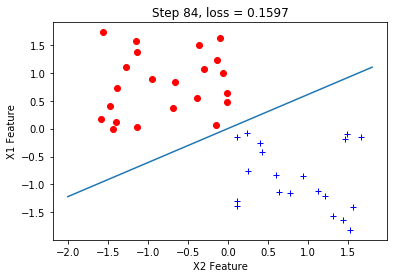

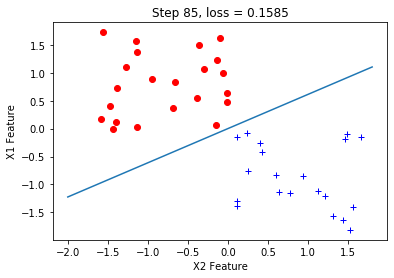

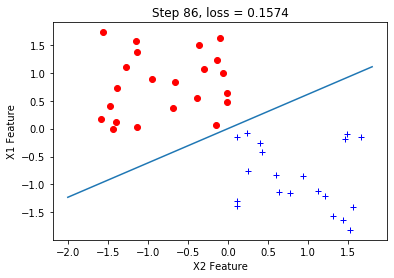

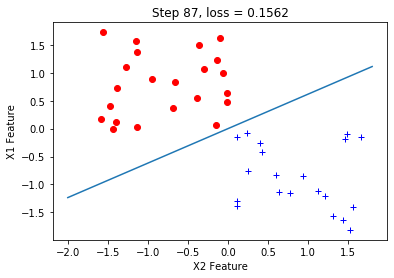

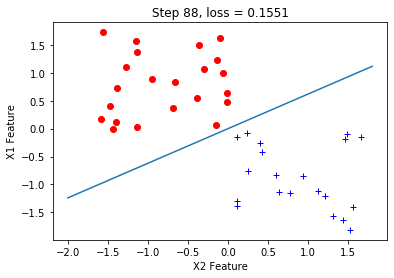

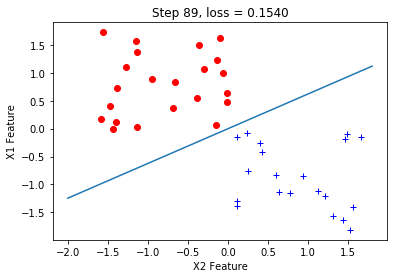

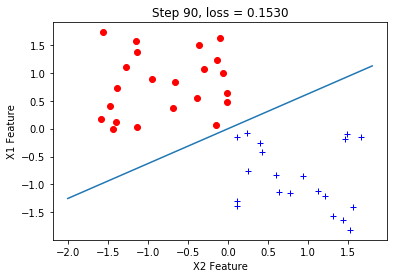

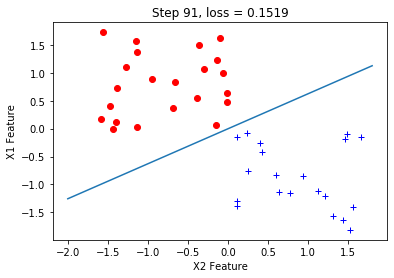

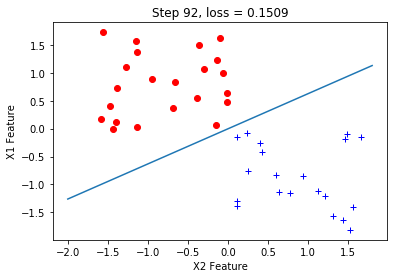

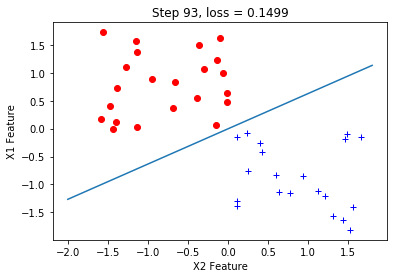

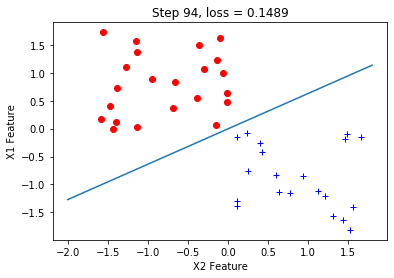

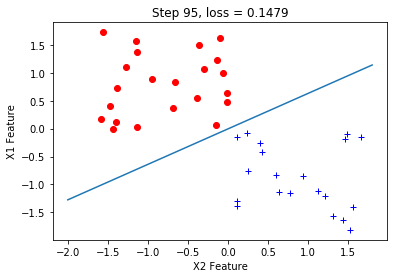

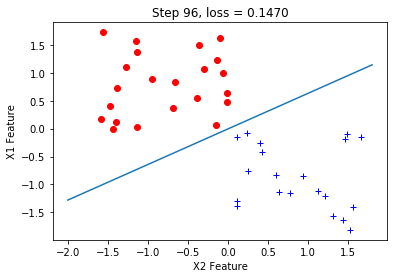

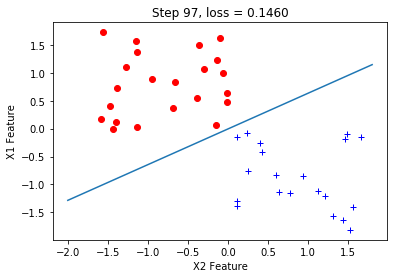

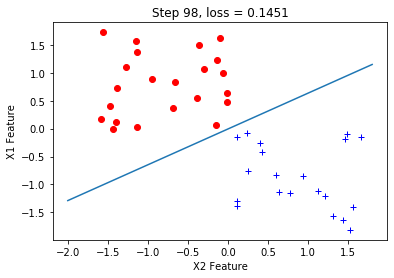

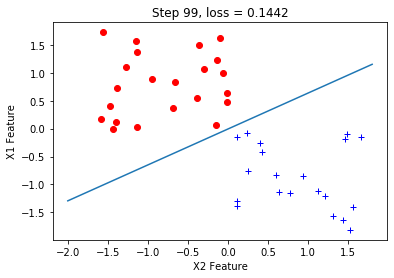

Optimized variable: w1_op =  -1.1183498
Optimized variable: w2_op =  1.738186
Optimized variable: b_op =  0.011327455


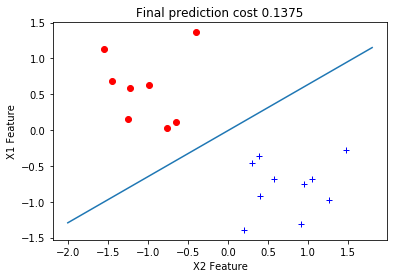

In [5]:
with tf.Session() as sess:
    sess.run(initializer)
    for i in range(100):
        _, train_cost = sess.run([optimizer, cost], feed_dict={X1: x_train[:, 0], X2: x_train[:, 1], L: label_train, batch_size: len(label_train)})
        
        w1_op = sess.run(w1)
        w2_op = sess.run(w2)
        b_op = sess.run(b)
        
        draw_model(w1_op, w2_op, b_op)
        visualize_data(x_train, label_train,"Step {}, loss = {:.4f}".format(i, train_cost))

    test_cost = sess.run(cost, feed_dict={X1: x_test[:, 0], X2: x_test[:, 1], L: label_test, batch_size: len(label_test)})
    print('Optimized variable: w1_op = ', w1_op)
    print('Optimized variable: w2_op = ', w2_op)
    print('Optimized variable: b_op = ', b_op)
    draw_model(w1_op, w2_op, b_op)
    visualize_data(x_test, label_test, "Final prediction cost {:.4f}".format(test_cost))